In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load performance CSV
df = pd.read_csv("perf.csv")   # change filename if needed

# Extract data
x = df["TotalRequests"]
duration = df["Duration"]
avg = df["AvgResTime"]
min_rt = df["MinResTime"]
max_rt = df["MaxResTime"]

# ---- Plot 1: Duration vs Total Requests ----
plt.figure(figsize=(7,4))
plt.plot(x, duration, marker='o')
plt.title("Total Requests vs Duration")
plt.xlabel("Total Requests")
plt.ylabel("Duration (ms)")
plt.grid(True)
plt.tight_layout()

# ---- Plot 2: Average Response Time ----
plt.figure(figsize=(7,4))
plt.plot(x, avg, marker='s', color='green')
plt.title("Total Requests vs Avg Response Time")
plt.xlabel("Total Requests")
plt.ylabel("Avg Response Time (ms)")
plt.grid(True)
plt.tight_layout()

# ---- Plot 3: Min/Max Response Time ----
plt.figure(figsize=(7,4))
plt.plot(x, min_rt, label="Min", marker='^')
plt.plot(x, max_rt, label="Max", marker='v')
plt.title("Response Time Extremes")
plt.xlabel("Total Requests")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


ModuleNotFoundError: No module named 'pandas'

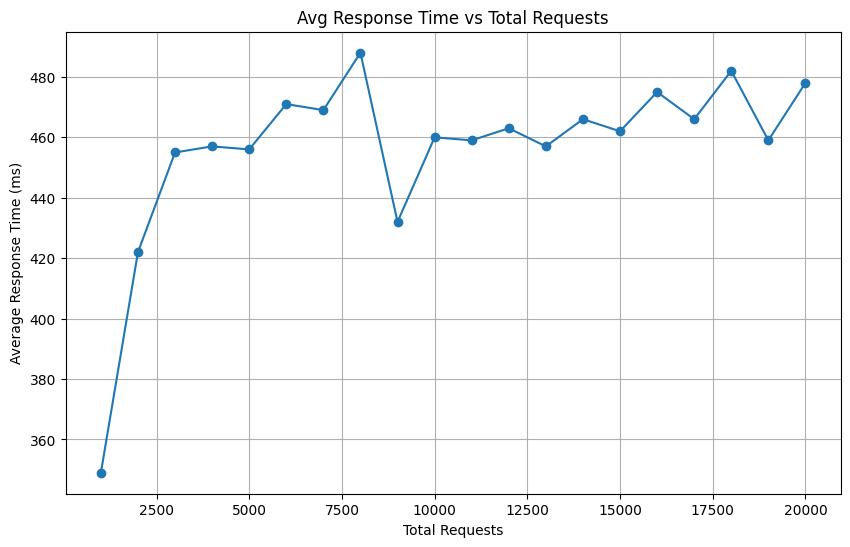

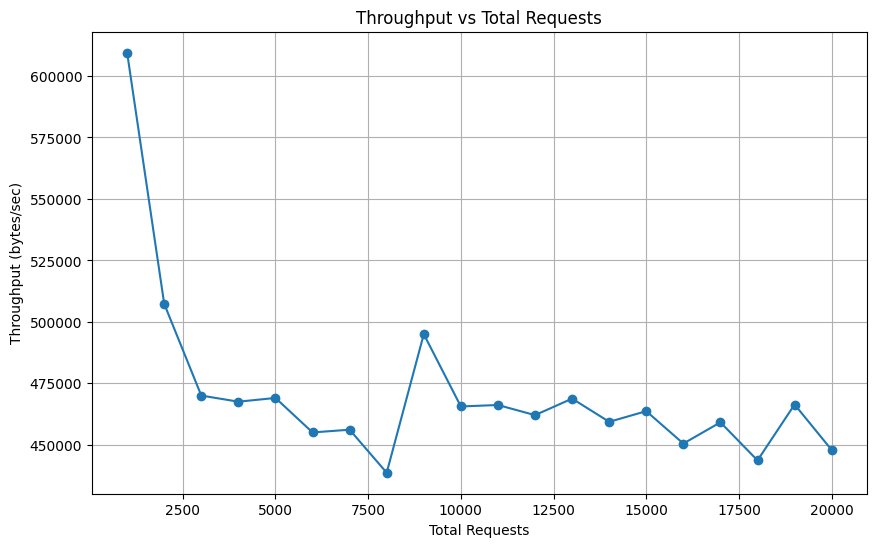

/tmp/ipykernel_70616/2901768370.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=labels, showmeans=True)


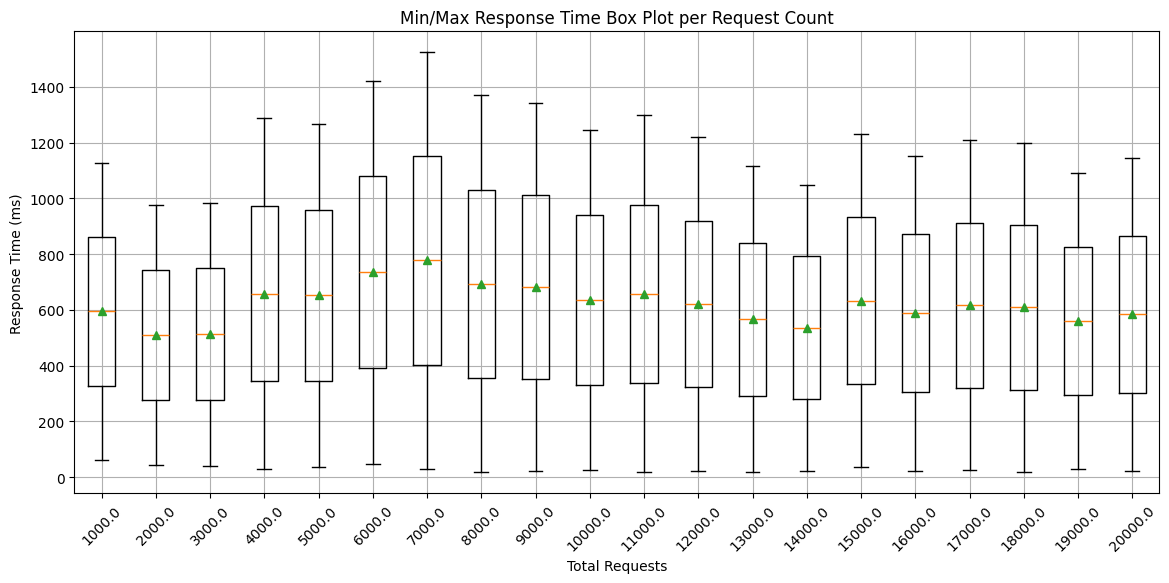


Saved:
> avg_response_vs_requests.png
> throughput_vs_requests.png
> response_time_boxplot.png



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ====================== READ CSV ======================
file_name = "Upload.csv"  
df = pd.read_csv(file_name)

# ====================== THROUGHPUT ======================
# Throughput = TotalBytes / Duration
BYTES_PER_REQUEST = 4299185
df["Throughput (bytes/sec)"] = (df["TotalRequests"] * BYTES_PER_REQUEST) / df["Duration"]

# ====================== PLOT 1: RESP TIME vs REQUESTS ======================
plt.figure(figsize=(10,6))
plt.plot(df["TotalRequests"], df["AvgResTime"], marker='o')
plt.title("Avg Response Time vs Total Requests")
plt.xlabel("Total Requests")
plt.ylabel("Average Response Time (ms)")
plt.grid(True)
# plt.savefig("avg_response_vs_requests.png", dpi=300)
plt.show()
plt.close()

# ====================== PLOT 2: THROUGHPUT vs REQUESTS ======================
plt.figure(figsize=(10,6))
plt.plot(df["TotalRequests"], df["Throughput (bytes/sec)"], marker='o')
plt.title("Throughput vs Total Requests")
plt.xlabel("Total Requests")
plt.ylabel("Throughput (bytes/sec)")
plt.grid(True)
# plt.savefig("throughput_vs_requests.png", dpi=300)
plt.show()
plt.close()

# ====================== PLOT 3: BOX PLOT using Min/Max ======================

stats = []
labels = []

for idx, row in df.iterrows():
    stats.append({
        "med": row["AvgResTime"],         # use avg as median
        "mean": row["AvgResTime"],        # use avg as mean
        "q1": row["MinResTime"],          # approximate lower quartile
        "q3": row["MaxResTime"],          # approximate upper quartile
        "whislo": row["MinResTime"],      # bottom whisker (min)
        "whishi": row["MaxResTime"]       # top whisker (max)
    })
    labels.append(row["TotalRequests"])

plt.figure(figsize=(14, 6))
bp = plt.bxp(stats, showmeans=True)
plt.title("Response Time Box Plot per Request Count (Min/Max + Avg)")
plt.xlabel("Total Requests")
plt.ylabel("Response Time (ms)")
plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("response_time_boxplot.png", dpi=300)
plt.close()


print("\nSaved:")
print("> avg_response_vs_requests.png")
print("> throughput_vs_requests.png")
print("> response_time_boxplot.png\n")


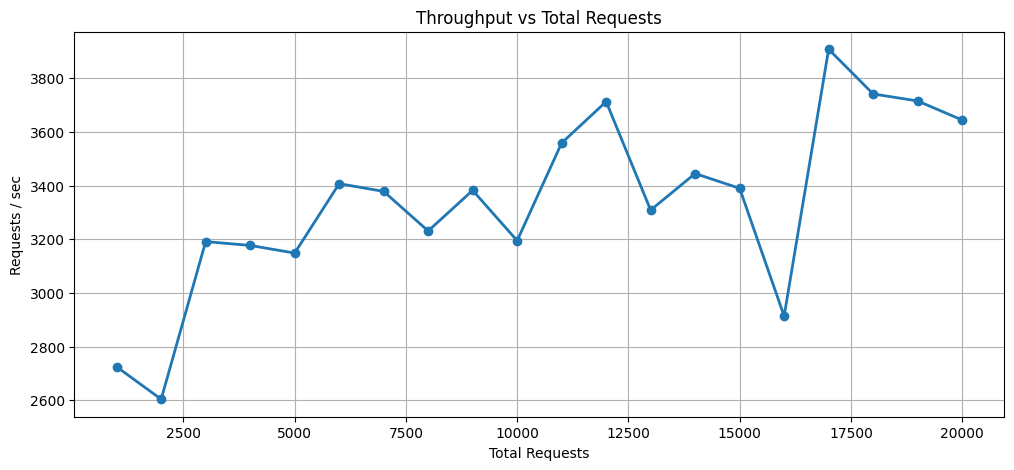

/tmp/ipykernel_70616/3980500083.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['MinResTime'], df['AvgResTime'], df['MaxResTime']],


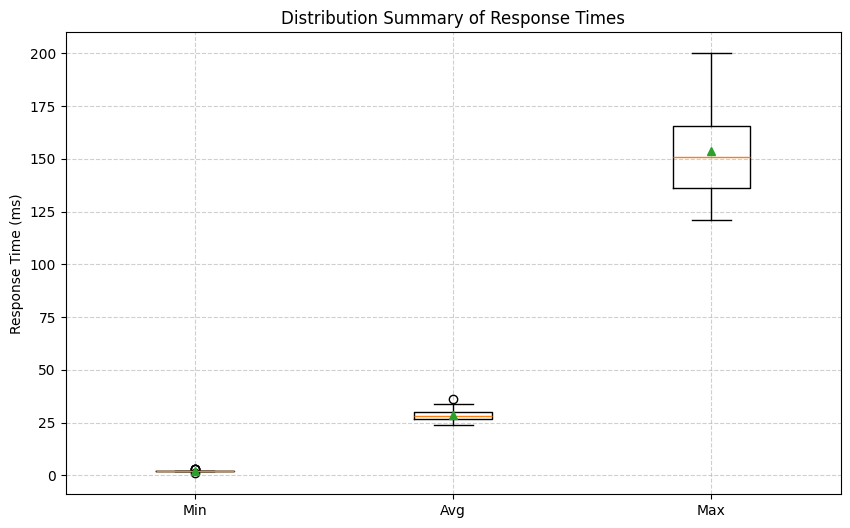

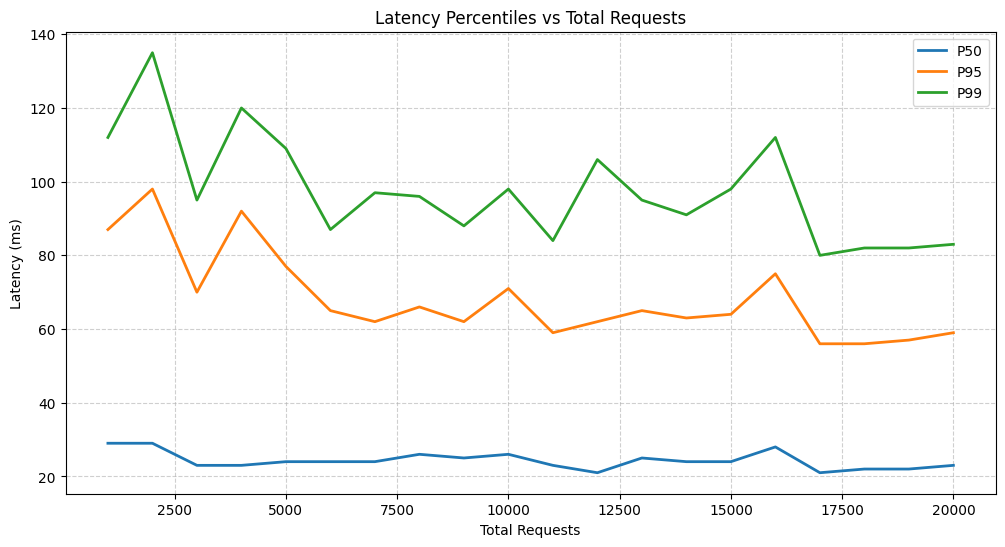

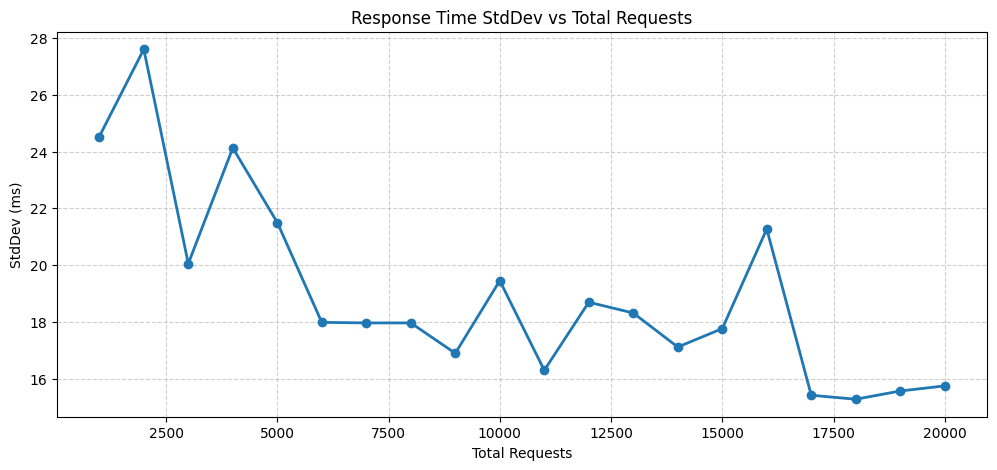

In [4]:
# 100 clients on 5 cores

import pandas as pd
import matplotlib.pyplot as plt

# ==================== LOAD CSV ====================
df = pd.read_csv("FinalDelete.csv")   # Change file name if needed

# Compute Throughput (requests/sec)
df['Throughput'] = df['TotalRequests'] / (df['Duration']/1000)

# ==================== PLOT 1: Throughput vs Total Requests ====================
plt.figure(figsize=(12,5))
plt.plot(df['TotalRequests'], df['Throughput'], marker='o', linewidth=2)
plt.title("Throughput vs Total Requests")
plt.xlabel("Total Requests")
plt.ylabel("Requests / sec")
plt.grid(True)
# plt.savefig("throughput_vs_requests.png", dpi=300)
plt.show()

# ==================== PLOT 2: Response Time Box Plot ====================
plt.figure(figsize=(10,6))
plt.boxplot([df['MinResTime'], df['AvgResTime'], df['MaxResTime']],
            labels=['Min','Avg','Max'], showmeans=True)
plt.title("Distribution Summary of Response Times")
plt.ylabel("Response Time (ms)")
plt.grid(True, linestyle="--", alpha=0.6)
# plt.savefig("response_time_boxplot.png", dpi=300)
plt.show()

# ==================== PLOT 3: Latency Percentiles ====================
plt.figure(figsize=(12,6))
plt.plot(df['TotalRequests'], df['P50'], label="P50", linewidth=2)
plt.plot(df['TotalRequests'], df['P95'], label="P95", linewidth=2)
plt.plot(df['TotalRequests'], df['P99'], label="P99", linewidth=2)
plt.title("Latency Percentiles vs Total Requests")
plt.xlabel("Total Requests")
plt.ylabel("Latency (ms)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
# plt.savefig("latency_percentiles.png", dpi=300)
plt.show()

# ==================== PLOT 4: StdDev vs Total Requests ====================
plt.figure(figsize=(12,5))
plt.plot(df['TotalRequests'], df['StdDev'], marker='o', linewidth=2)
plt.title("Response Time StdDev vs Total Requests")
plt.xlabel("Total Requests")
plt.ylabel("StdDev (ms)")
plt.grid(True, linestyle="--", alpha=0.6)
# plt.savefig("stddev_vs_requests.png", dpi=300)
plt.show()


✓ Saved: 01_throughput_vs_clients.png


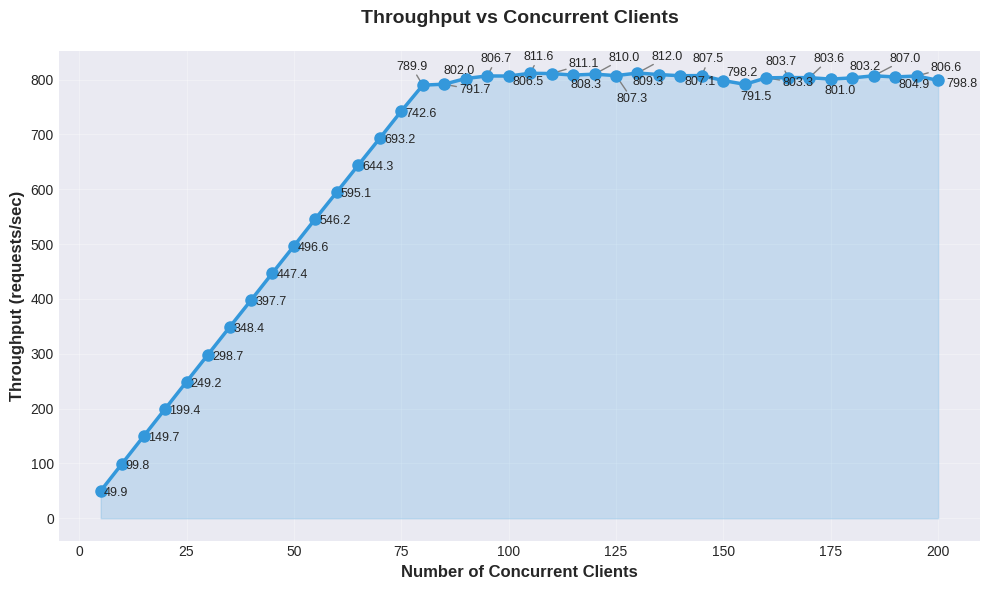

✓ Saved: 02_response_time_vs_clients.png


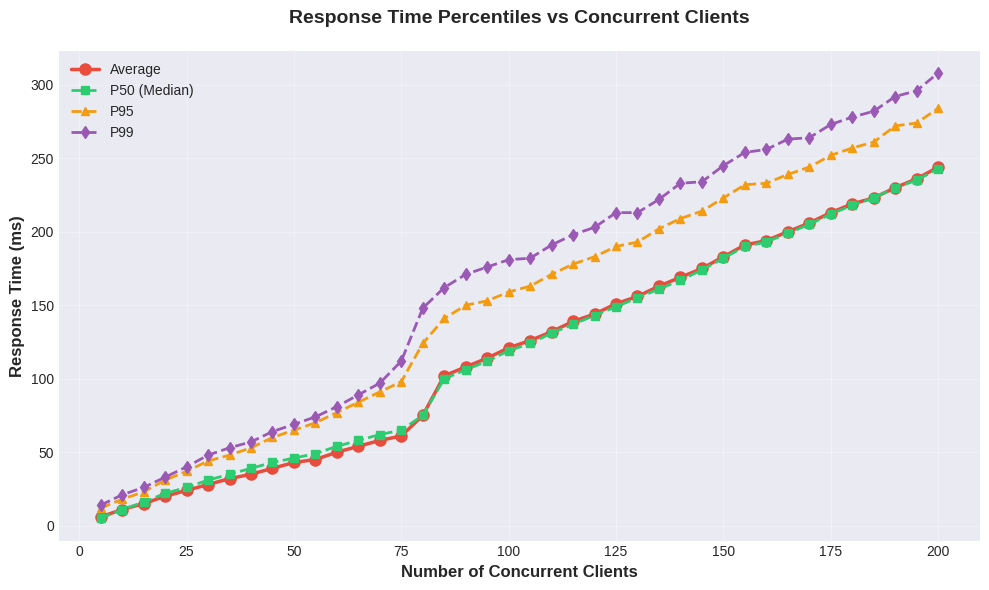

✓ Saved: 04_variance_stability.png


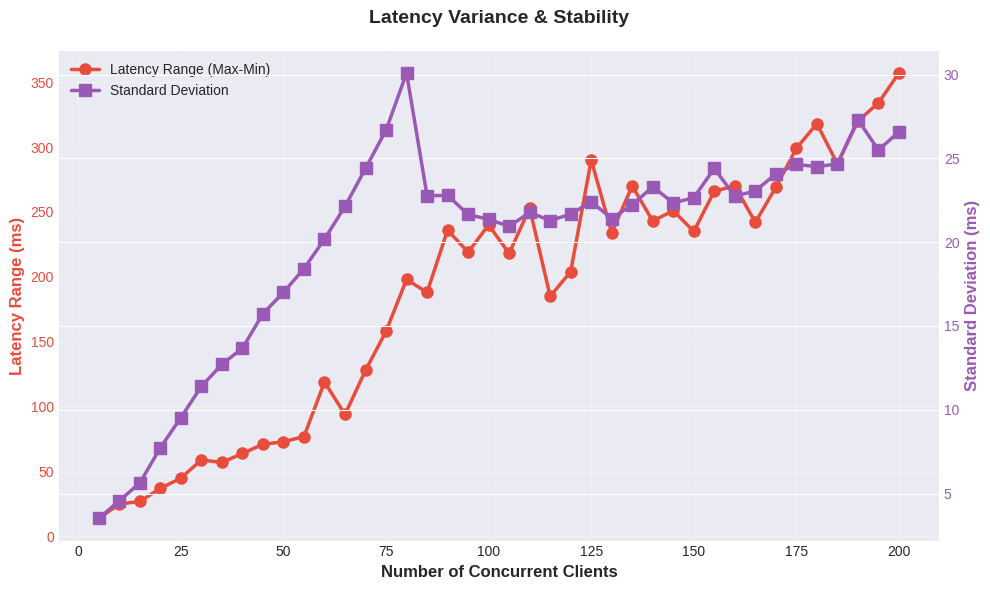

✓ Saved: 05_success_rate.png


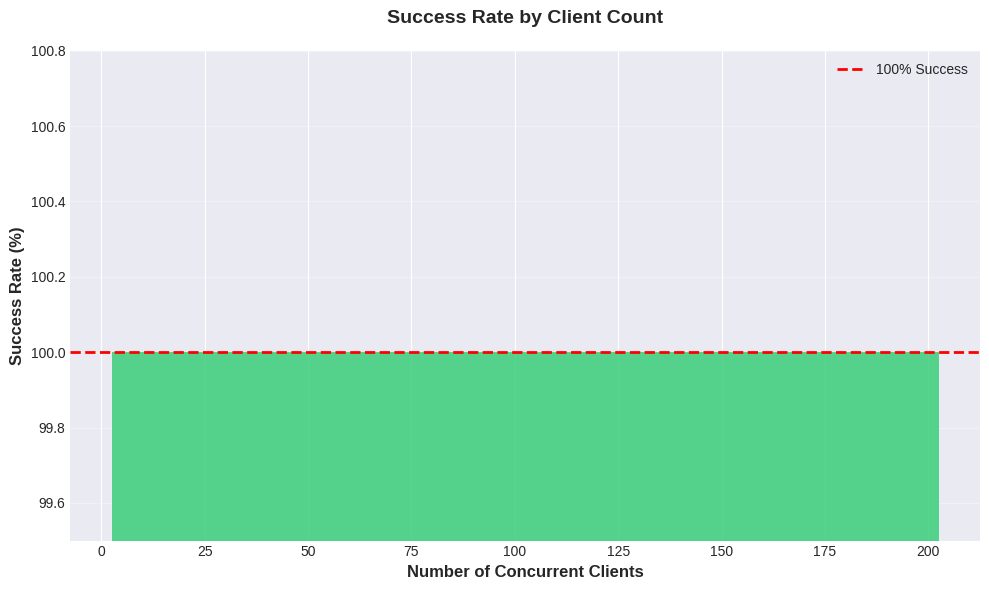

✓ Saved: 08_system_saturation.png


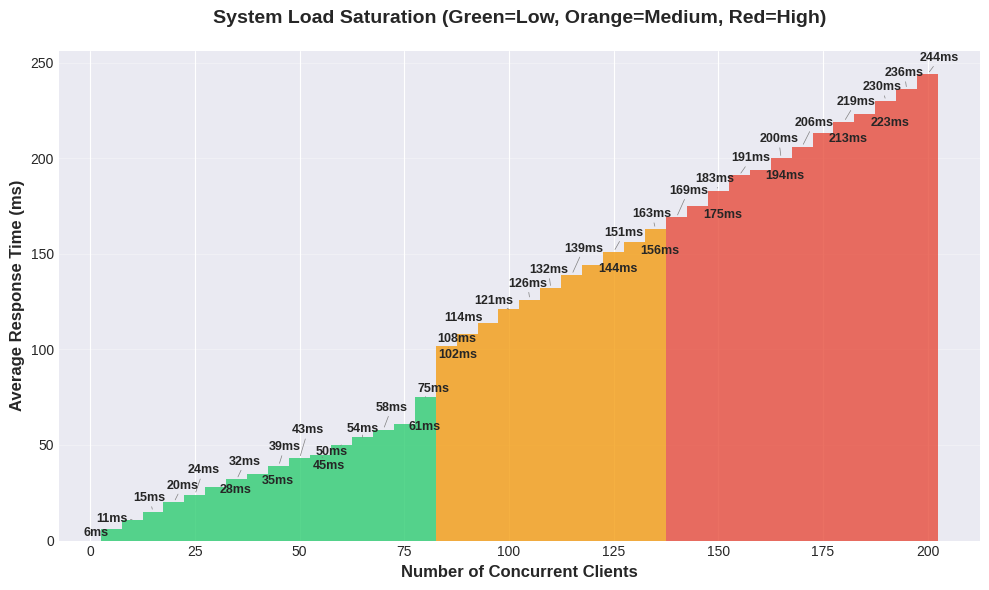


✓ All visualizations generated successfully!

Files created:
  01_throughput_vs_clients.png
  02_response_time_vs_clients.png
  03_min_avg_max_response.png
  04_variance_stability.png
  05_success_rate.png
  06_test_duration.png
  07_latency_consistency.png
  08_system_saturation.png

Key Observations:
  • Throughput decreases as clients increase: 49.94 → 798.75 req/sec
  • Response time increases: 6ms → 244ms
  • Variance increases: 3.52 → 26.59 ms
  • Success rate: 100.00% (All requests successful)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

df = pd.read_csv("cpu.csv")

# Calculate throughput (requests per second)
df['Throughput'] = df['TotalRequests'] / (df['Duration'] / 1000)

# Calculate latency variance
df['LatencyVariance'] = df['MaxResTime'] - df['MinResTime']

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# ============ PLOT 1: Throughput vs Number of Clients ============
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['NumClients'], df['Throughput'], marker='o', linewidth=2.5, markersize=8, color='#3498db')
ax.fill_between(df['NumClients'], df['Throughput'], alpha=0.2, color='#3498db')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Throughput (requests/sec)', fontsize=12, fontweight='bold')
ax.set_title('Throughput vs Concurrent Clients', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
# for i, (x, y) in enumerate(zip(df['NumClients'], df['Throughput'])):
#     ax.text(x, y + 2, f'{y:.1f}', ha='center', va='bottom', fontsize=9)
texts = []
for x, y in zip(df['NumClients'], df['Throughput']):
    texts.append(ax.text(x, y, f'{y:.1f}', fontsize=9))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.tight_layout()
plt.savefig('cpu_01_throughput_vs_clients.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_throughput_vs_clients.png")
plt.show()
plt.close()

# ============ PLOT 2: Response Time vs Number of Clients ============
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['NumClients'], df['AvgResTime'], marker='o', label='Average', linewidth=2.5, markersize=8, color='#e74c3c')
ax.plot(df['NumClients'], df['P50'], marker='s', label='P50 (Median)', linewidth=2, markersize=6, linestyle='--', color='#2ecc71')
ax.plot(df['NumClients'], df['P95'], marker='^', label='P95', linewidth=2, markersize=6, linestyle='--', color='#f39c12')
ax.plot(df['NumClients'], df['P99'], marker='d', label='P99', linewidth=2, markersize=6, linestyle='--', color='#9b59b6')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Response Time (ms)', fontsize=12, fontweight='bold')
ax.set_title('Response Time Percentiles vs Concurrent Clients', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cpu_02_response_time_vs_clients.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 02_response_time_vs_clients.png")
plt.show()
plt.close()

# ============ PLOT 4: Latency Variance & Standard Deviation ============
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
line1 = ax.plot(df['NumClients'], df['LatencyVariance'], marker='o', linewidth=2.5, markersize=8, 
                color='#e74c3c', label='Latency Range (Max-Min)')
line2 = ax2.plot(df['NumClients'], df['StdDev'], marker='s', linewidth=2.5, markersize=8, 
                 color='#9b59b6', label='Standard Deviation')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Latency Range (ms)', fontsize=12, fontweight='bold', color='#e74c3c')
ax2.set_ylabel('Standard Deviation (ms)', fontsize=12, fontweight='bold', color='#9b59b6')
ax.set_title('Latency Variance & Stability', fontsize=14, fontweight='bold', pad=20)
ax.tick_params(axis='y', labelcolor='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#9b59b6')
ax.grid(True, alpha=0.3)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('cpu_04_variance_stability.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 04_variance_stability.png")
plt.show()
plt.close()

# ============ PLOT 5: Success Rate ============
fig, ax = plt.subplots(figsize=(10, 6))
success_rate = (df['SuccessfulRequests'] / df['TotalRequests']) * 100
ax.bar(df['NumClients'], success_rate, color='#2ecc71', alpha=0.8, width=5)
ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='100% Success')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Success Rate by Client Count', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim([99.5, 100.8])
ax.grid(True, axis='y', alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig('cpu_05_success_rate.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 05_success_rate.png")
plt.show()
plt.close()



# ============ PLOT 8: System Saturation Indicator ============
fig, ax = plt.subplots(figsize=(10, 6))
saturation = ((df['AvgResTime'] - df['AvgResTime'].min()) /
              (df['AvgResTime'].max() - df['AvgResTime'].min()) * 100)
colors_sat = ['#2ecc71' if x < 33 else '#f39c12' if x < 66 else '#e74c3c' for x in saturation]
bars = ax.bar(df['NumClients'], df['AvgResTime'], color=colors_sat, alpha=0.8, width=5)
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Response Time (ms)', fontsize=12, fontweight='bold')
ax.set_title('System Load Saturation (Green=Low, Orange=Medium, Red=High)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, axis='y', alpha=0.3)
texts = []
for x, y in zip(df['NumClients'], df['AvgResTime']):
    texts.append(ax.text(x, y, f'{y:.0f}ms', fontsize=9, fontweight='bold', ha='center'))
adjust_text(texts, only_move={'points': 'y', 'text':'y'}, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
plt.tight_layout()
plt.savefig('cpu_08_system_saturation.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 08_system_saturation.png")
plt.show()
plt.close()


print("\n" + "="*70)
print("✓ All visualizations generated successfully!")
print("\nFiles created:")
print("  01_throughput_vs_clients.png")
print("  02_response_time_vs_clients.png")
print("  03_min_avg_max_response.png")
print("  04_variance_stability.png")
print("  05_success_rate.png")
print("  06_test_duration.png")
print("  07_latency_consistency.png")
print("  08_system_saturation.png")
print("\nKey Observations:")
print(f"  • Throughput decreases as clients increase: {df['Throughput'].iloc[0]:.2f} → {df['Throughput'].iloc[-1]:.2f} req/sec")
print(f"  • Response time increases: {df['AvgResTime'].iloc[0]}ms → {df['AvgResTime'].iloc[-1]}ms")
print(f"  • Variance increases: {df['StdDev'].iloc[0]:.2f} → {df['StdDev'].iloc[-1]:.2f} ms")
print(f"  • Success rate: {(df['SuccessfulRequests'].sum() / df['TotalRequests'].sum()) * 100:.2f}% (All requests successful)")
print("="*70)

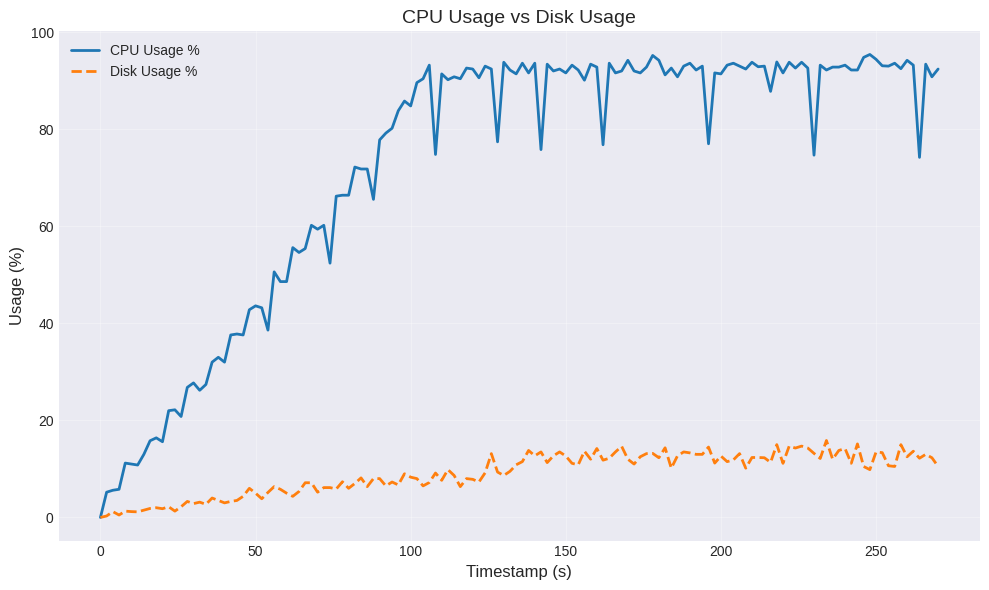

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two datasets
df1 = pd.read_csv("perf/cpu_cputest.csv")
df2 = pd.read_csv("perf/disk_cputest.csv")

# print(df1)
# print(df2)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both CPU curves
ax.plot(df1['timestamp'], df1['cpu_percent'], label='CPU Usage %', linewidth=2)
ax.plot(df2['timestamp'], df2['%util'], label='Disk Usage %', linewidth=2, linestyle='--')

# Labels and title
ax.set_xlabel("Timestamp (s)", fontsize=12)
ax.set_ylabel("Usage (%)", fontsize=12)
ax.set_title("CPU Usage vs Disk Usage", fontsize=14)

# Grid and legend
ax.grid(True, alpha=0.3)
ax.legend()

# Save + show
plt.tight_layout()
plt.savefig("cpu_vs_disk_utilization_cpu_bottleneck.png", dpi=300)
plt.show()
plt.close()


In [5]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 11.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


✓ Saved: 01_throughput_vs_clients.png


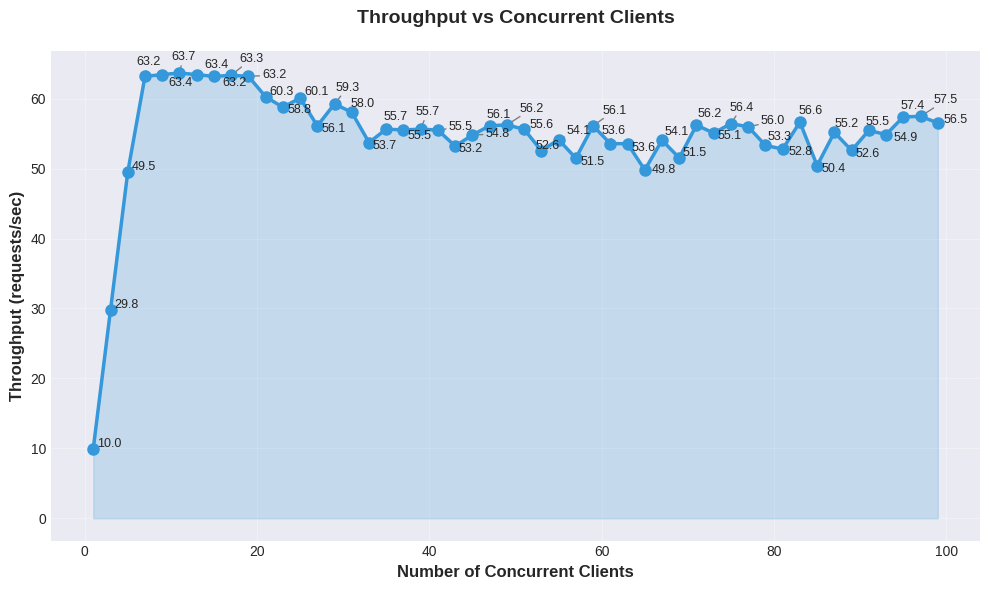

✓ Saved: 02_response_time_vs_clients.png


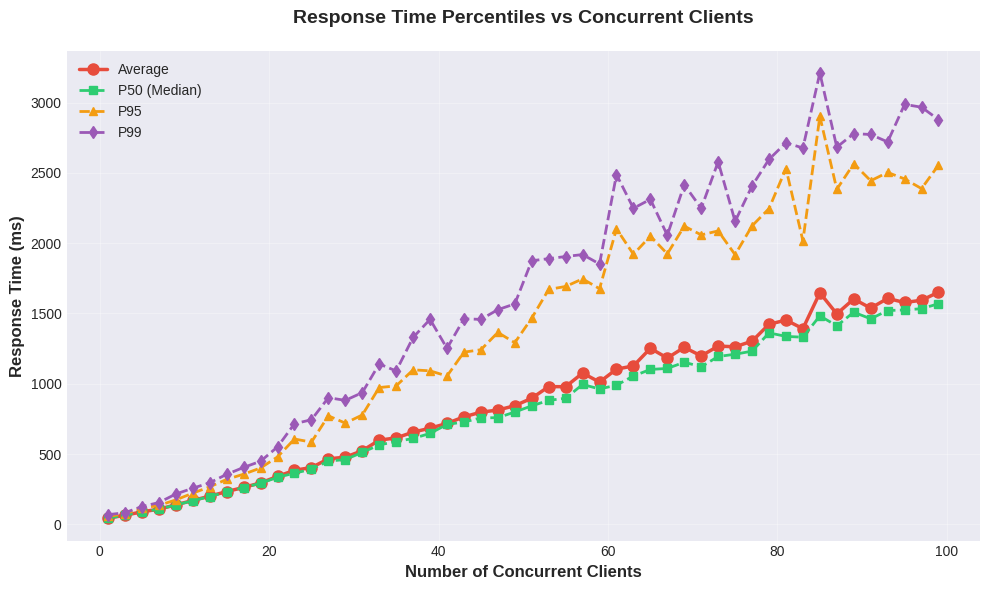

✓ Saved: 04_variance_stability.png


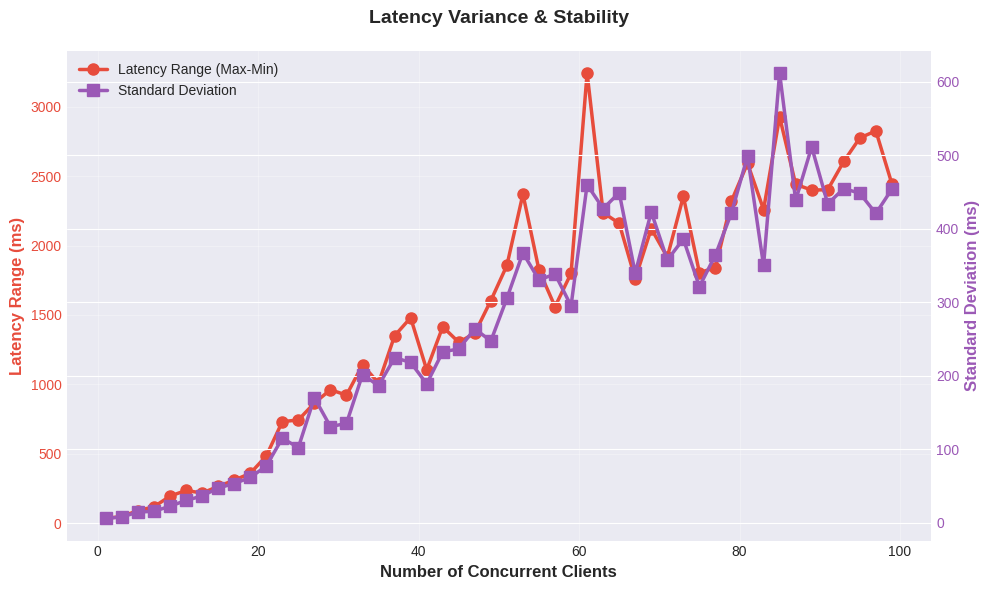

✓ Saved: 05_success_rate.png


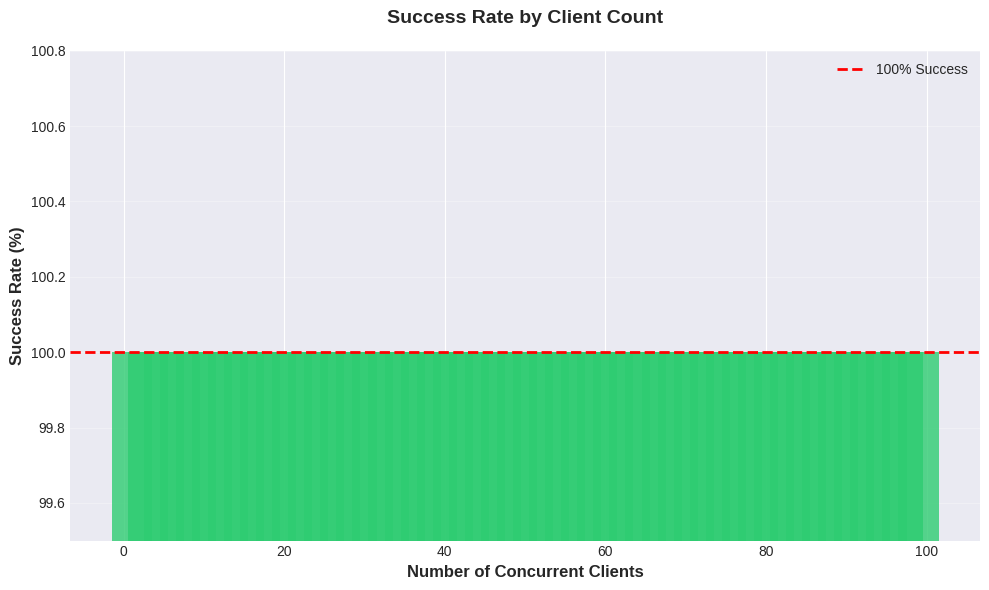

✓ Saved: 08_system_saturation.png


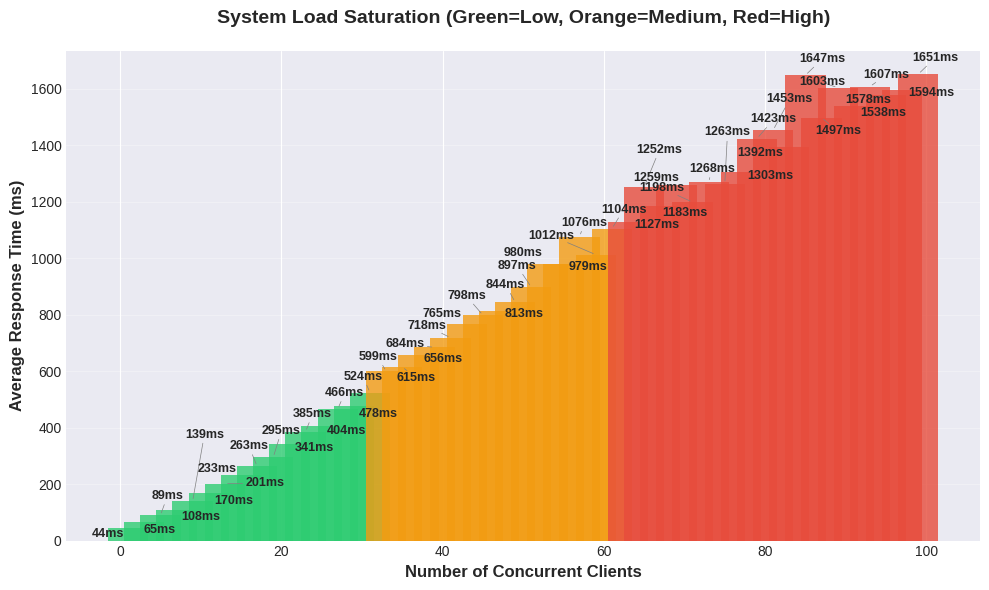


✓ All visualizations generated successfully!

Files created:
  01_throughput_vs_clients.png
  02_response_time_vs_clients.png
  03_min_avg_max_response.png
  04_variance_stability.png
  05_success_rate.png
  06_test_duration.png
  07_latency_consistency.png
  08_system_saturation.png

Key Observations:
  • Throughput decreases as clients increase: 9.96 → 56.55 req/sec
  • Response time increases: 44ms → 1651ms
  • Variance increases: 5.96 → 453.96 ms
  • Success rate: 100.00% (All requests successful)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

df = pd.read_csv("Upload.csv")

# Calculate throughput (requests per second)
df['Throughput'] = df['TotalRequests'] / (df['Duration'] / 1000)

# Calculate latency variance
df['LatencyVariance'] = df['MaxResTime'] - df['MinResTime']

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# ============ PLOT 1: Throughput vs Number of Clients ============
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['NumClients'], df['Throughput'], marker='o', linewidth=2.5, markersize=8, color='#3498db')
ax.fill_between(df['NumClients'], df['Throughput'], alpha=0.2, color='#3498db')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Throughput (requests/sec)', fontsize=12, fontweight='bold')
ax.set_title('Throughput vs Concurrent Clients', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
# for i, (x, y) in enumerate(zip(df['NumClients'], df['Throughput'])):
#     ax.text(x, y + 2, f'{y:.1f}', ha='center', va='bottom', fontsize=9)
texts = []
for x, y in zip(df['NumClients'], df['Throughput']):
    texts.append(ax.text(x, y, f'{y:.1f}', fontsize=9))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.tight_layout()
plt.savefig('01_throughput_vs_clients.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_throughput_vs_clients.png")
plt.show()
plt.close()

# ============ PLOT 2: Response Time vs Number of Clients ============
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['NumClients'], df['AvgResTime'], marker='o', label='Average', linewidth=2.5, markersize=8, color='#e74c3c')
ax.plot(df['NumClients'], df['P50'], marker='s', label='P50 (Median)', linewidth=2, markersize=6, linestyle='--', color='#2ecc71')
ax.plot(df['NumClients'], df['P95'], marker='^', label='P95', linewidth=2, markersize=6, linestyle='--', color='#f39c12')
ax.plot(df['NumClients'], df['P99'], marker='d', label='P99', linewidth=2, markersize=6, linestyle='--', color='#9b59b6')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Response Time (ms)', fontsize=12, fontweight='bold')
ax.set_title('Response Time Percentiles vs Concurrent Clients', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('02_response_time_vs_clients.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 02_response_time_vs_clients.png")
plt.show()
plt.close()

# ============ PLOT 4: Latency Variance & Standard Deviation ============
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
line1 = ax.plot(df['NumClients'], df['LatencyVariance'], marker='o', linewidth=2.5, markersize=8, 
                color='#e74c3c', label='Latency Range (Max-Min)')
line2 = ax2.plot(df['NumClients'], df['StdDev'], marker='s', linewidth=2.5, markersize=8, 
                 color='#9b59b6', label='Standard Deviation')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Latency Range (ms)', fontsize=12, fontweight='bold', color='#e74c3c')
ax2.set_ylabel('Standard Deviation (ms)', fontsize=12, fontweight='bold', color='#9b59b6')
ax.set_title('Latency Variance & Stability', fontsize=14, fontweight='bold', pad=20)
ax.tick_params(axis='y', labelcolor='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#9b59b6')
ax.grid(True, alpha=0.3)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('04_variance_stability.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 04_variance_stability.png")
plt.show()
plt.close()

# ============ PLOT 5: Success Rate ============
fig, ax = plt.subplots(figsize=(10, 6))
success_rate = (df['SuccessfulRequests'] / df['TotalRequests']) * 100
ax.bar(df['NumClients'], success_rate, color='#2ecc71', alpha=0.8, width=5)
ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='100% Success')
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Success Rate by Client Count', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim([99.5, 100.8])
ax.grid(True, axis='y', alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig('05_success_rate.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 05_success_rate.png")
plt.show()
plt.close()


# ============ PLOT 8: System Saturation Indicator ============
fig, ax = plt.subplots(figsize=(10, 6))
saturation = ((df['AvgResTime'] - df['AvgResTime'].min()) /
              (df['AvgResTime'].max() - df['AvgResTime'].min()) * 100)
colors_sat = ['#2ecc71' if x < 33 else '#f39c12' if x < 66 else '#e74c3c' for x in saturation]
bars = ax.bar(df['NumClients'], df['AvgResTime'], color=colors_sat, alpha=0.8, width=5)
ax.set_xlabel('Number of Concurrent Clients', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Response Time (ms)', fontsize=12, fontweight='bold')
ax.set_title('System Load Saturation (Green=Low, Orange=Medium, Red=High)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, axis='y', alpha=0.3)
texts = []
for x, y in zip(df['NumClients'], df['AvgResTime']):
    texts.append(ax.text(x, y, f'{y:.0f}ms', fontsize=9, fontweight='bold', ha='center'))
adjust_text(texts, only_move={'points': 'y', 'text':'y'}, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
plt.tight_layout()
plt.savefig('08_system_saturation.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 08_system_saturation.png")
plt.show()
plt.close()


print("\n" + "="*70)
print("✓ All visualizations generated successfully!")
print("\nFiles created:")
print("  01_throughput_vs_clients.png")
print("  02_response_time_vs_clients.png")
print("  03_min_avg_max_response.png")
print("  04_variance_stability.png")
print("  05_success_rate.png")
print("  06_test_duration.png")
print("  07_latency_consistency.png")
print("  08_system_saturation.png")
print("\nKey Observations:")
print(f"  • Throughput decreases as clients increase: {df['Throughput'].iloc[0]:.2f} → {df['Throughput'].iloc[-1]:.2f} req/sec")
print(f"  • Response time increases: {df['AvgResTime'].iloc[0]}ms → {df['AvgResTime'].iloc[-1]}ms")
print(f"  • Variance increases: {df['StdDev'].iloc[0]:.2f} → {df['StdDev'].iloc[-1]:.2f} ms")
print(f"  • Success rate: {(df['SuccessfulRequests'].sum() / df['TotalRequests'].sum()) * 100:.2f}% (All requests successful)")
print("="*70)

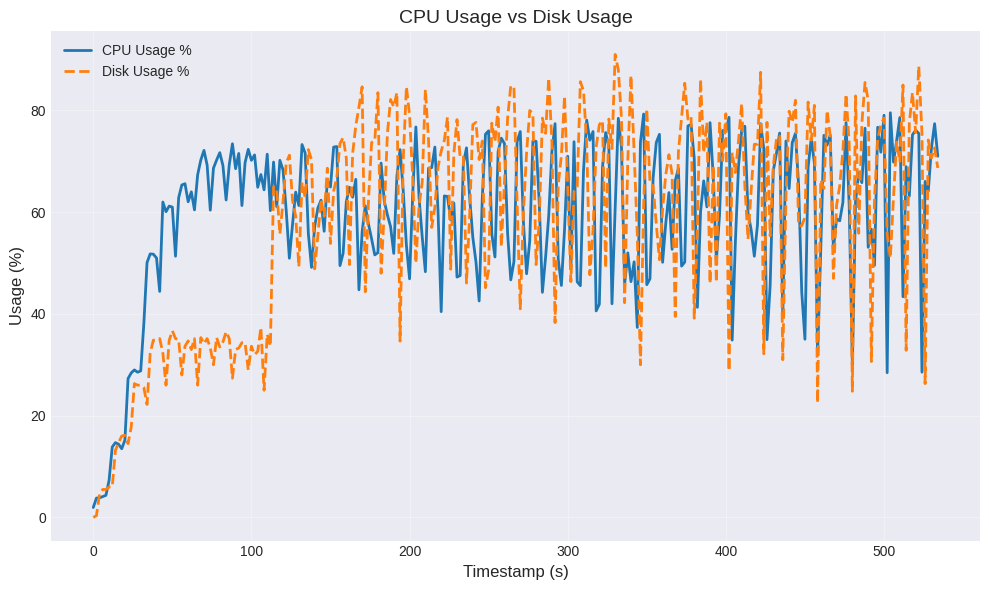

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two datasets
df1 = pd.read_csv("perf/cpu_disktest.csv")
df2 = pd.read_csv("perf/disk_disktest.csv")

# print(df1)
# print(df2)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both CPU curves
ax.plot(df1['timestamp'], df1['cpu_percent'], label='CPU Usage %', linewidth=2)
ax.plot(df2['timestamp'], df2['%util'], label='Disk Usage %', linewidth=2, linestyle='--')

# Labels and title
ax.set_xlabel("Timestamp (s)", fontsize=12)
ax.set_ylabel("Usage (%)", fontsize=12)
ax.set_title("CPU Usage vs Disk Usage", fontsize=14)

# Grid and legend
ax.grid(True, alpha=0.3)
ax.legend()

# Save + show
plt.tight_layout()
plt.savefig("cpu_vs_disk_utilization.png", dpi=300)
plt.show()
plt.close()